In [1]:
import os
os.getcwd()
os.chdir("../..")
os.getcwd()

'/home/caleb/Cornell-Conversational-Analysis-Toolkit'

In [2]:
import convokit
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [24]:
reddit_corpus_dir = "/sauna/reddit_201810_raw/reddit-corpus-2/reddit-corpus"

In [25]:
# corpus = convokit.Corpus(filename=convokit.download('reddit-corpus'))
corpus = convokit.Corpus(filename=os.path.join(reddit_corpus_dir, 'reddit-corpus'))

In [26]:
hc = convokit.HyperConvo(min_thread_len=10, prefix_len=10, include_root=False)

In [27]:
motif_count_feats = hc.retrieve_motif_counts(corpus)

In [28]:
motif_counts_df = pd.DataFrame.from_dict(motif_count_feats, orient='index')
motif_feat_names = list(motif_counts_df.columns)

In [29]:
thread_pfxs = corpus.utterance_threads(prefix_len=10, include_root=False)

In [30]:
thread_to_subreddit = dict()
for thread_id, utts in thread_pfxs.items():
    thread_to_subreddit[thread_id] = [utts[next(iter(utts))].meta['subreddit']]

In [31]:
path_stats = hc.retrieve_motif_pathway_stats(corpus)

In [32]:
path_stats_df = pd.DataFrame.from_dict(path_stats, orient='index')
columns = ['PATH-'+', '.join(filter(lambda x: type(x) == str, col)).strip() for col in path_stats_df.columns.values]
path_stats_df.columns = columns
path_feat_names = list(path_stats_df.columns)

In [33]:
subreddit_df = pd.DataFrame.from_dict(thread_to_subreddit, orient='index', columns=['subreddit'])

In [34]:
motif_counts_df = pd.concat([motif_counts_df, path_stats_df, subreddit_df], axis=1)

In [35]:
subreddit_motif_means = motif_counts_df.groupby('subreddit').mean()

In [36]:
subreddit_motif_means

,NO_EDGE_TRIADS,SINGLE_EDGE_TRIADS,INCOMING_TRIADS,OUTGOING_TRIADS,DYADIC_TRIADS,UNIDIRECTIONAL_TRIADS,INCOMING_2TO3_TRIADS,INCOMING_1TO3_TRIADS,DIRECTED_CYCLE_TRIADS,OUTGOING_3TO1_TRIADS,...,"PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS"
subreddit,,,,,,,,,,,,,,,,,,,,,
2007scape,21.265,14.832,3.289,0.082,2.380,2.078,0.029,1.978,0.000,0.573,...,0.542,0.054,0.001,0.000,0.004,0.003,0.0,0.000,0.0,0.0
AmItheAsshole,8.658,5.303,1.746,0.082,1.459,0.828,0.031,1.796,0.000,0.499,...,0.464,0.048,0.000,0.000,0.005,0.004,0.0,0.000,0.0,0.0
Android,20.936,14.356,3.814,0.125,2.867,1.843,0.054,2.111,0.000,0.616,...,0.586,0.031,0.001,0.001,0.004,0.000,0.0,0.001,0.0,0.0
AskMen,19.842,12.206,3.914,0.075,2.017,1.430,0.026,2.346,0.000,0.429,...,0.407,0.042,0.000,0.000,0.004,0.001,0.0,0.000,0.0,0.0
AskTrumpSupporters,8.841,2.943,2.167,0.036,1.028,0.351,0.012,2.439,0.000,0.194,...,0.177,0.034,0.001,0.000,0.000,0.000,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trees,18.035,11.818,3.154,0.090,2.030,1.626,0.034,1.834,0.000,0.491,...,0.461,0.037,0.002,0.000,0.002,0.002,0.0,0.000,0.0,0.0
unitedkingdom,16.703,11.931,3.044,0.126,2.574,1.557,0.046,2.128,0.001,0.582,...,0.530,0.046,0.001,0.000,0.002,0.001,0.0,0.000,0.0,0.0
videos,31.428,20.391,5.741,0.109,2.324,2.570,0.051,1.910,0.000,0.532,...,0.501,0.024,0.001,0.000,0.002,0.000,0.0,0.000,0.0,0.0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subreddit_motif_means_scaled = pd.DataFrame(scaler.fit_transform(subreddit_motif_means), 
                                            index=subreddit_motif_means.index, 
                                            columns=subreddit_motif_means.columns)

In [15]:
subreddit_motif_means_scaled_T = subreddit_motif_means_scaled.T

In [38]:
subreddit_motif_means_scaled.head()

,NO_EDGE_TRIADS,SINGLE_EDGE_TRIADS,INCOMING_TRIADS,OUTGOING_TRIADS,DYADIC_TRIADS,UNIDIRECTIONAL_TRIADS,INCOMING_2TO3_TRIADS,INCOMING_1TO3_TRIADS,DIRECTED_CYCLE_TRIADS,OUTGOING_3TO1_TRIADS,...,"PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, DIRECTED_CYCLE_1TO3_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS","PATH-NO_EDGE_TRIADS, SINGLE_EDGE_TRIADS, UNIDIRECTIONAL_TRIADS, OUTGOING_3TO1_TRIADS, INCOMING_RECIPROCAL_TRIADS, DIRECIPROCAL_2TO3_TRIADS, TRIRECIPROCAL_TRIADS"
subreddit,,,,,,,,,,,,,,,,,,,,,
2007scape,0.330374,0.551024,-0.191223,-0.512761,0.653538,0.751950,-0.552744,0.134419,-0.37909,0.842165,...,0.89494,1.079288,-0.020004,-0.386556,0.583397,1.029399,-0.175863,-0.662266,-0.356332,-0.314485
AmItheAsshole,-1.217173,-1.196776,-1.198483,-0.512761,-0.952323,-1.038612,-0.443182,-0.296291,-0.37909,0.242240,...,0.23428,0.623572,-1.020204,-0.386556,1.104286,1.702209,-0.175863,-0.662266,-0.356332,-0.314485
Android,0.289988,0.463716,0.151494,0.406702,1.502674,0.415325,0.816791,0.449169,-0.37909,1.190770,...,1.26762,-0.667624,-0.020004,2.586949,0.583397,-0.989030,-0.175863,0.662266,-0.356332,-0.314485
AskMen,0.155696,0.069365,0.216773,-0.662441,0.020609,-0.176277,-0.717089,1.005305,-0.37909,-0.325257,...,-0.24851,0.167855,-1.020204,-0.386556,0.583397,-0.316221,-0.175863,-0.662266,-0.356332,-0.314485
AskTrumpSupporters,-1.194710,-1.629645,-0.923657,-1.496372,-1.703817,-1.721891,-1.484028,1.225393,-0.37909,-2.230425,...,-2.19661,-0.439766,-0.020004,-0.386556,-1.500163,-0.989030,-0.175863,-0.662266,-0.356332,-0.314485


In [17]:
subreddit_motif_means_scaled_T.head()

subreddit,2007scape,AmItheAsshole,Android,AskMen,AskTrumpSupporters,AskWomen,Bitcoin,CFB,CanadaPolitics,Christianity,...,technology,techsupport,teenagers,tifu,toronto,trees,unitedkingdom,videos,worldnews,wow
NO_EDGE_TRIADS,0.330374,-1.217173,0.289988,0.155696,-1.194710,0.395187,-0.336543,0.801500,-0.827433,-1.660066,...,0.252303,-2.039864,-1.533017,1.193082,0.167726,-0.066118,-0.229625,1.577913,0.111014,0.615038
SINGLE_EDGE_TRIADS,0.551024,-1.196776,0.463716,0.069365,-1.629645,-0.232359,-0.264274,0.447208,-0.610202,-1.534634,...,0.317348,-1.908441,-1.536101,1.158324,0.283966,-0.001801,0.018925,1.570650,0.298639,0.842660
INCOMING_TRIADS,-0.191223,-1.198483,0.151494,0.216773,-0.923657,1.086946,-0.274127,1.445330,-0.895587,-1.689383,...,0.218079,-2.124796,-1.558172,0.960304,0.154758,-0.279350,-0.351157,1.409426,-0.047608,0.162591
OUTGOING_TRIADS,-0.512761,-0.512761,0.406702,-0.662441,-1.496372,-0.256167,0.620530,1.197868,0.727445,-0.769355,...,-0.063721,-1.945412,-1.517755,-0.256167,1.069570,-0.341698,0.428085,0.064576,0.107342,-0.085104
DYADIC_TRIADS,0.653538,-0.952323,1.502674,0.020609,-1.703817,-0.014263,-0.077033,0.871489,0.744206,-1.222581,...,0.439075,-2.783109,-2.216437,0.299586,0.861027,0.043276,0.991798,0.555896,0.632615,0.786052


In [18]:
subreddit_motif_means_scaled.to_csv('./../subreddit_motif_means_scaled.csv')

In [19]:
subreddit_motif_means_scaled_T.to_csv('./../subreddit_motif_means_scaled_T.csv')

In [7]:
subreddit_motif_means_scaled = pd.read_csv('./../subreddit_motif_means_scaled.csv', index_col='subreddit')

In [10]:
subreddit_motif_means_scaled.values

array([[ 0.33037375,  0.55102363, -0.19122271, ..., -0.28288731,
        -0.62568826, -0.81179841],
       [-1.21717338, -1.19677583, -1.19848259, ...,  0.69584269,
         0.97864062,  1.59709895],
       [ 0.28998802,  0.4637162 ,  0.15149371, ..., -0.128351  ,
        -0.84446038, -0.57090867],
       ...,
       [ 1.57791254,  1.57064974,  1.40942618, ..., -1.15430042,
        -1.57370079, -0.81179841],
       [ 0.11101413,  0.29863911, -0.04760821, ...,  0.04335602,
        -1.13615655, -0.81179841],
       [ 0.61503797,  0.84265981,  0.1625912 , ..., -0.36015547,
        -0.84446038, -0.57090867]])

In [12]:
subreddit_motif_means_scaled.values.shape

(100, 16)

In [159]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(subreddit_motif_means_scaled[path_feat_names].values, k=90)

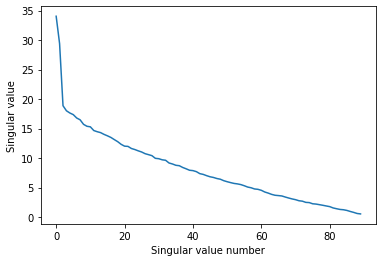

In [160]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [147]:
subreddits_compressed, _, motifs_compressed = svds(subreddit_motif_means_scaled[path_feat_names].values, k=5)
motifs_compressed = motifs_compressed.transpose()

In [148]:
print(motifs_compressed.shape)
print(subreddits_compressed.shape)

(100, 5)
(100, 5)


In [149]:
from sklearn.preprocessing import normalize
motifs_compressed = normalize(motifs_compressed, axis=1)

In [150]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [151]:
print(subreddits_compressed.shape)
projected_subreddits = tsne.fit_transform(subreddits_compressed)
print(projected_subreddits.shape)

(100, 5)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.096623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.055618
[t-SNE] KL divergence after 1000 iterations: 0.311880
(100, 2)


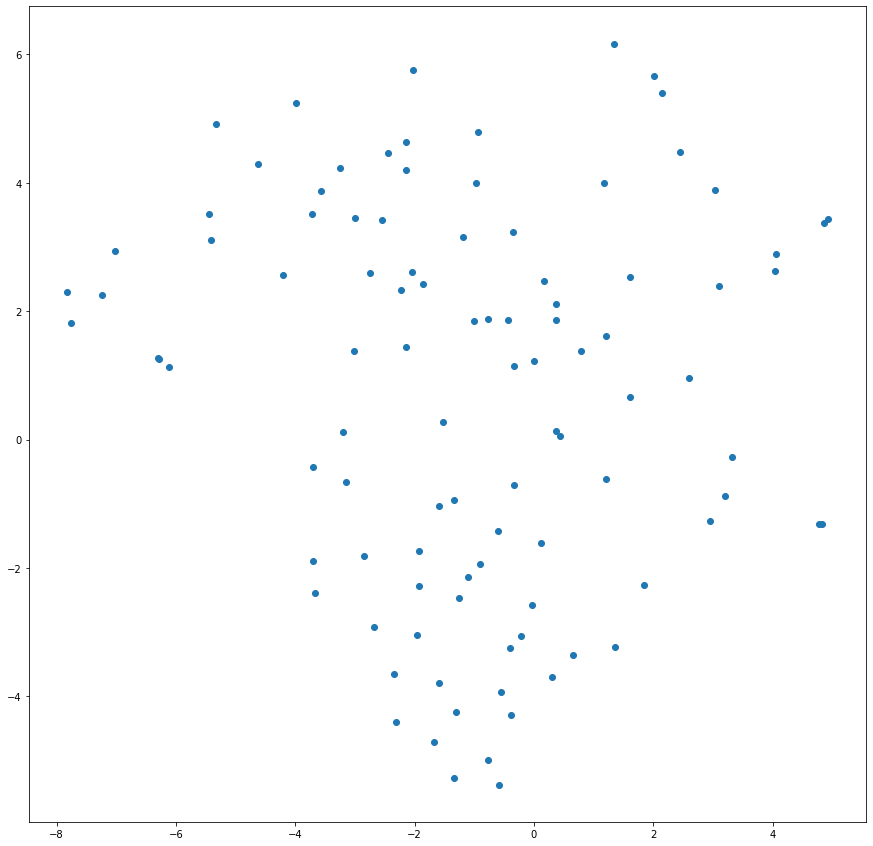

In [152]:
plt.figure(figsize=(15,15))
plt.scatter(projected_subreddits[:,0], projected_subreddits[:, 1])
plt.show()

In [153]:
games = {"Guildwars2", "2007scape", "skyrim", "wow", "pokemon", "DotA2", "starcraft", "Diablo", "leagueoflegends", "Minecraft", "Games"}
sports = {"baseball", "CFB", "hockey", "MMA", "nba", "nfl", "soccer"}
tech = {"Android", "apple", "technology", "programming"}
reaction_bait = {"WTF", "pics", "gifs", "aww", "funny", "todayilearned", "AdviceAnimals"}
relationships = {"AskMen", "AskWomen", "MGTOW", "sex", "AmItheAsshole", "relationships", "raisedbynarcissists", "relationship_advice"}
rightbias = {"MensRights", "guns", "AskTrumpSupporters", "The_Donald", "Conservative", "TheRedPill"}
countries = {"singapore", "canada", "unitedkingdom", "australia", "toronto"}

In [154]:
from collections import defaultdict

    
color_to_project = defaultdict(list)
for i in range(projected_subreddits.shape[0]):
    sr = subreddit_motif_means.index[i]
    if sr in games:
        color_to_project['green'].append(i)
    elif sr in sports:
        color_to_project['red'].append(i)
    elif sr in tech:
        color_to_project['pink'].append(i)
    elif sr in reaction_bait:
        color_to_project['blue'].append(i)
    elif sr in relationships:
        color_to_project['orange'].append(i)
    elif sr in rightbias:
        color_to_project['yellow'].append(i)
    elif sr in countries:
        color_to_project['black'].append(i)
    else:
        color_to_project['grey'].append(i)

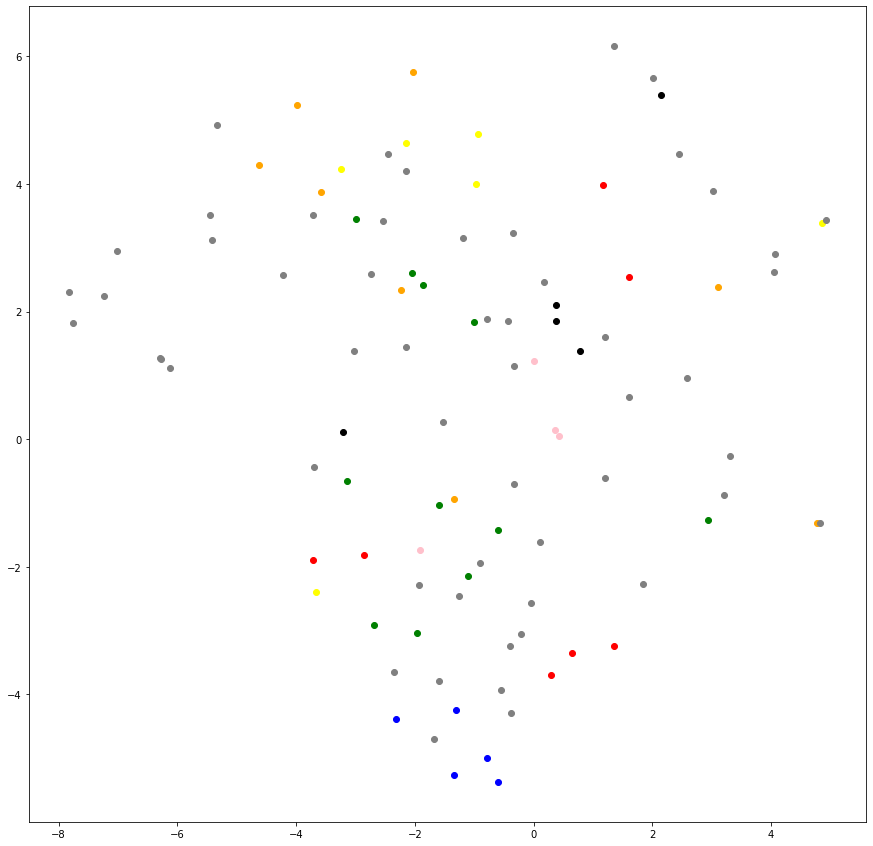

In [155]:
import numpy as np
plt.figure(figsize=(15,15))
for color, indices in color_to_project.items():
    indices = np.array(indices)
    plt.scatter(projected_subreddits[indices, 0], 
               projected_subreddits[indices, 1],
               color=color)
plt.show()